In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_gaussian_quantiles

## DATA

In [2]:
# Let's generate dataset

In [3]:
X1, y1 = make_gaussian_quantiles(cov=1,
                                 n_samples=10000, n_features=2,
                                 n_classes=1, random_state=0)
X2, y2 = make_gaussian_quantiles(cov=1,
                                 n_samples=100, n_features=2,
                                 n_classes=1, random_state=0)

X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)

X = pd.DataFrame(np.concatenate((X1, X2))).reset_index(drop=True)
X.columns = ['feature_1', 'feature_2']
y = pd.Series(np.concatenate((y1, - y2 + 1)))
X['label'] = y

## BINARY CLASSIFICATION

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=X['label'])


In [5]:
# Let´t try naive classifier, that would classify all the data as label 0

class best_classifier:

    def predict(self, X):
        return np.zeros(len(X))



In [6]:
model = best_classifier()
predicted = model.predict(X_test)
acc = accuracy_score(predicted, y_test)

print("Accuracy: %.3f" % acc)

Accuracy: 0.990


Text(0.5, 1.0, 'Binary classification data')

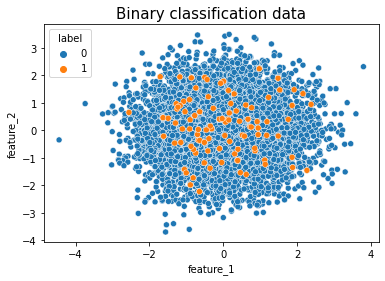

In [7]:
# Accuracy of 0.99 does not sound bad...
# Let's look at the data

sns.scatterplot(data=X,x='feature_1',y='feature_2',hue='label')
plt.title('Binary classification data', fontsize=15)

In [8]:
# Let's check different metrics

precision = precision_score(predicted, y_test)
recall = recall_score(predicted, y_test,zero_division=0)

print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)

Precision: 0.000
Recall: 0.000


In [9]:
report = classification_report(y_test,predicted,digits=2,
                               output_dict=True,zero_division=0)
df = pd.DataFrame(report).transpose()

print(df)

              precision    recall  f1-score      support
0              0.990099  1.000000  0.995025  2000.000000
1              0.000000  0.000000  0.000000    20.000000
accuracy       0.990099  0.990099  0.990099     0.990099
macro avg      0.495050  0.500000  0.497512  2020.000000
weighted avg   0.980296  0.990099  0.985173  2020.000000


<AxesSubplot:title={'center':'Confusion Matrix'}>

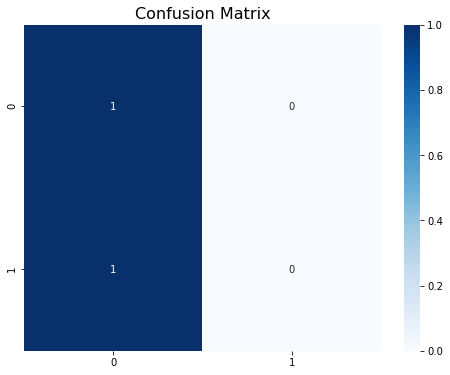

In [10]:
cm = confusion_matrix(y_test, predicted, normalize='true')
plt.figure(figsize=(8, 6))


df_cm = pd.DataFrame(cm)
df_cm.columns = ['0', '1']
df_cm.index = ['0', '1']
plt.title('Confusion Matrix', size=16)
sns.heatmap(df_cm, annot=True, cmap='Blues')

# Accuracy metrics alone is not able to describe the results enough...